<img src='./logo.jpg'>

kaggle ref: https://www.kaggle.com/vikrishnan/boston-house-prices  
sklearn ref: sklearn

In [119]:
# 분석
import pandas as pd
import numpy as np

# 경고
import warnings
warnings.filterwarnings(action='ignore')

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# 데이터 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

In [120]:
# 사이킷런
from sklearn.model_selection import train_test_split

# 사이킷런 분류
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC

# 사이킷런 분류 점수
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 						 # ---> y_true, y_pred
# from sklearn.metrics import precision_recall_curve # y_true, probas_pred
# from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 분류 ensemble
# import xgboost as xgb
# from xgboost import plot_importance 
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier # lgb.쓰기 귀찮으니까 Classifier까지 import
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [121]:
# 사이킷런 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.svm import SVC #linear SVC는 classifier 성 / SVC는 분류말고 회귀에도 쓸 수 있다.

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 사이킷런 회귀 점수
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score # squared=False로 하면 RMSE

In [122]:
# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# StratifiedFold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

# DataLoad

In [123]:
data=pd.read_csv("./dataset/gg_boston.csv")

* 유니크값 -> x
* chas, rad -> int 처리
* rm, age -> binning 가능
* crim unique하긴 한데 바로 버리지 않아도 될듯 의미 있으니까 -> binning해도 될듯 하다 / 근데 회귀라 안 해도 될 수 있음 / 점수 봐가면서

## 함수 준비

In [124]:
def my_fit_score(data):
    y=data['price']
    X=data.drop('price', axis=1)
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True, random_state=1024)
    model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),XGBRegressor(),LGBMRegressor()]
    for model in model_list:
        model.fit(X_train, y_train)
        pred=model.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        print(f"{model.__class__.__name__}\t\tMSE: {mse:.4f}")

In [125]:
# def my_fit_score(data):
#     model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),XGBRegressor(),LGBMRegressor()]
#     y = df["price"]
#     X = df.drop(["price"])
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
#     model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),XGBRegressor(),LGBMRegressor()]
#     for model in model_list:
#         model.fit(X_train, y_train)
#         pred = model.predict(X_test)
#         myscore(y_test, pred)


# 1차 점수

In [126]:
my_fit_score(data) # 0에 가까울수록 좋다!

LinearRegression		MSE: 0.1597
Lasso		MSE: 1.0315
ElasticNet		MSE: 0.6393
Ridge		MSE: 0.1600
XGBRegressor		MSE: 0.1202
LGBMRegressor		MSE: 0.1333


# 연습: plot

<AxesSubplot:>

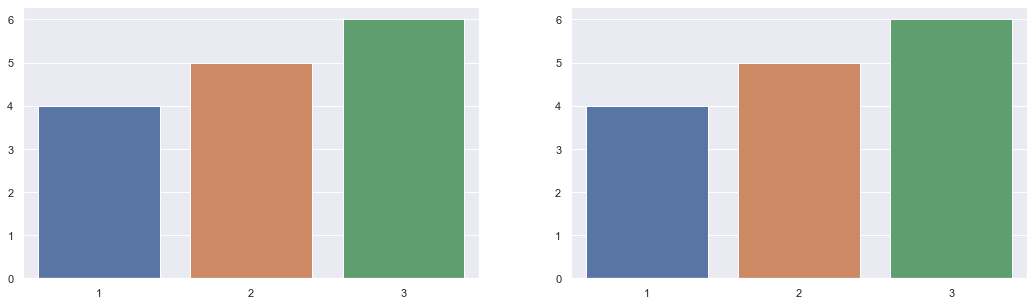

In [127]:
# bar charts: X축 1,2,3 Y축 4,5,6
X=[1,2,3]
Y=[4,5,6]
f, axs = plt.subplots(1, 2)
sns.barplot(x=X,y=Y, ax=axs[0])
sns.barplot(x=X,y=Y, ax=axs[1])

<AxesSubplot:>

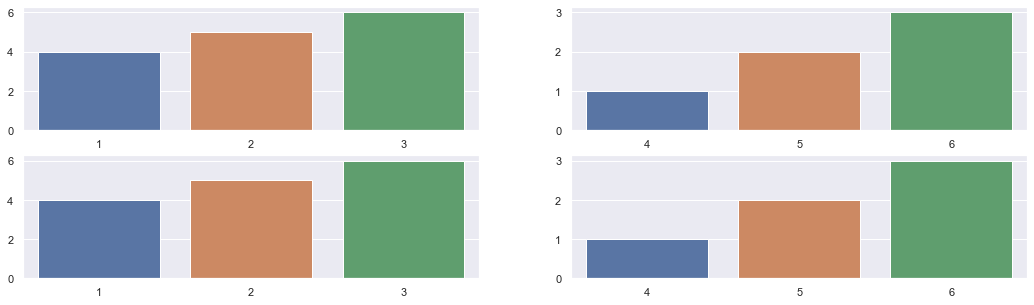

In [128]:
# X=[1,1,1,1,1,1,1,2,2,2,2,2,3,3,3]
# Y=[4,5,6,6,6,6,6,5,5,4,4]
# Z=[2,5,8,8,6,5,3,3,5]
# U=[3,2,3,5,6,4,3,3,4]
X=[1,2,3]
Y=[4,5,6]
Z=[1,2,3]
U=[4,5,6]
f2, axs2 = plt.subplots(2, 2)
sns.barplot(x=X,y=Y, ax=axs2[0,0])
sns.barplot(x=Y,y=Z, ax=axs2[0,1])
sns.barplot(x=Z,y=U, ax=axs2[1,0])
sns.barplot(x=U,y=X, ax=axs2[1,1])

In [129]:
# Y축 price , X축 모든 컬럼 boxplot 따로따로

In [130]:
# f, axs=plt.subplots(1, 13)
# for i, col in enumerate(data.columns):
    
#     sns.boxplot(data=data, x=col, y="price", ax=axs[i])
    

In [131]:
# f, axs=plt.subplots(3, 4, figsize=(20,30))
# for i, col in enumerate(data.columns[0:4]):
#     sns.boxplot(data=data, x=col, y="price", ax=axs[0,i])
# for i, col in enumerate(data.columns[4:8]):
#     sns.boxplot(data=data, x=col, y="price", ax=axs[1,i])
# for i, col in enumerate(data.columns[8:12]):
#     sns.boxplot(data=data, x=col, y="price", ax=axs[2,i])

    

In [132]:
# f, axs=plt.subplots(3, 4)

# for num, col in enumerate(data.columns[:-1]):
#     i=num//4 # 행 : 번째를 열 개수로 나눈 몫
#     j=num%4  # 열 : 번째를 열 개수로 나눈 나머지
#     sns.boxplot(data=data, x=col, y="price", ax=axs[i,j])

# 규제
* [Lasso vs Ridge ==> ElasticNet] :: 규제 방식 같다
* XGBRegressor
* LGBMRegressor

<pre>
<b><font color=red>
class sklearn.linear_model.LinearRegression</b>(*,                    fit_intercept=True, normalize='deprecated',                   copy_X=True, n_jobs=None,                                 positive=False)
<b><font color=red>
# L1 규제
class sklearn.linear_model.Lasso</b>(alpha=1.0, *,                    fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
<b><font color=red>
# L2 규제
class sklearn.linear_model.Ridge</b>(alpha=1.0, *,                    fit_intercept=True, normalize='deprecated',                   copy_X=True, max_iter=None, tol=0.001,     solver='auto', positive=False, random_state=None)
<b><font color=red>
# L1 규제(0.5), L2 규제(0.5) == l1_ratio=0.5
class sklearn.linear_model.ElasticNet</b>(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')


https://velog.io/@sset2323/05-08.-%ED%9A%8C%EA%B7%80-%ED%8A%B8%EB%A6%AC

<b> <font color='red'>
Scikit-Learn Wrapper interface for XGBoost.                      
#---------------  :: feature_importances_, feature_name_,  evals_result(), intercept_, coef_ 
class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs) </b>
        max_depth: Optional[int] = None,
        learning_rate: Optional[float] = None,                   #---------(3)None
        n_estimators: int = 100,                                 #------------Default: 100
        verbosity: Optional[int] = None,
        objective: _SklObjective = None,                         #---------(2)목적함수/평가메트릭
        booster: Optional[str] = None,                           #---------(1)gbtree, gblinear or dart.
        tree_method: Optional[str] = None,
        n_jobs: Optional[int] = None,
        gamma: Optional[float] = None,
        min_child_weight: Optional[float] = None,
        max_delta_step: Optional[float] = None,
        subsample: Optional[float] = None,
        colsample_bytree: Optional[float] = None,
        colsample_bylevel: Optional[float] = None,
        colsample_bynode: Optional[float] = None,
        reg_alpha: Optional[float] = None,                      #---------(4)L1 regularization
        reg_lambda: Optional[float] = None,                     #---------(4)L2 regularization
        scale_pos_weight: Optional[float] = None,               #---------Balancing of positive and negative weights.
        base_score: Optional[float] = None,
        random_state: Optional[Union[np.random.RandomState, int]] = None,  #---------------

        missing: float = np.nan,
        num_parallel_tree: Optional[int] = None,
        monotone_constraints: Optional[Union[Dict[str, int], str]] = None,
        interaction_constraints: Optional[Union[str, List[Tuple[str]]]] = None,    #---------(“gain”, “weight”, “cover”, “total_gain” , “total_cover”.)
        importance_type: Optional[str] = None,                  #------For linear model, only “weight” (normalized coefficients without bias.)
        gpu_id: Optional[int] = None,
        validate_parameters: Optional[bool] = None,
        predictor: Optional[str] = None,
        enable_categorical: bool = False,
        
<b> <font color='red'>     
Scikit-Learn Wrapper interface for LGBMRegressor.  
#---------------  :: feature_importances_, feature_name_, evals_result_, best_score_
class lightgbm.LGBMRegressor(*args, **kwargs)  </b>
        boosting_type: str = 'gbdt',
        num_leaves: int = 31,
        max_depth: int = -1,
        learning_rate: float = 0.1,                        #------------Default: 0.1 
        n_estimators: int = 100,                           #------------Default: 100
        subsample_for_bin: int = 200000,
        objective: Optional[Union[str, Callable]] = None,  #------------Default: ‘regression’ 
        class_weight: Optional[Union[Dict, str]] = None,
        min_split_gain: float = 0.,
        min_child_weight: float = 1e-3,
        min_child_samples: int = 20,
        subsample: float = 1.,
        subsample_freq: int = 0,
        colsample_bytree: float = 1.,
        reg_alpha: float = 0.,                            #---------L1 regularization
        reg_lambda: float = 0.,                           #---------L2 regularization
        random_state: Optional[Union[int, np.random.RandomState]] = None,
        n_jobs: int = -1,
        silent: Union[bool, str] = 'warn',
        importance_type: str = 'split',                   #---------split/gain
        

## 회귀계수(학습에 가장 영향을 많이 준 피쳐)
* 주의: fit 해야 확인 가능
---
* 회귀함수 == f(X)== WX+b X: feature, W: 가중치
* coefficient(coef): 회귀계수==W(weight:가중치)==기울기
* bias: 절편==intercept==편향
---
* [Linear Model] : `coef_`, `intercept_`
* [Tree model]  : `coef_`, `intercept_`, `feature_importances_`

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

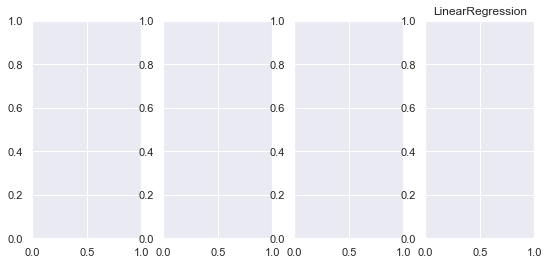

In [133]:
# 에러 ##########################################
y=data['price']
X=data.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True, random_state=1024)
model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge()]
f, axs = plt.subplots(1, 4, figsize=(9, 4))
for i, model in enumerate(model_list):
    model.fit(X_train, y_train)
    # print(model.coef_)
    # print(model.intercept_)
    # sns.barplot(x=model.coef_,y=data.columns)
    plt.title(model.__class__.__name__)
    sns.barplot(data=data, y=X.columns, X=model.coef_, ax=axs[i])
        
        
        
# model_list = [XGBRegressor(),LGBMRegressor()] # 얘네는 트리 방식이라 따로 본다
# for model in model_list:
        

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(9, 4))
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True, random_state=1024)
model_list = [XGBRegressor(),LGBMRegressor()]
for model in model_list:
    model.fit(X_train, y_train)
    print(model.feature_importances_)
    axs[i].set_title(model.__class__.__name__)
    sns.barplot(y=X.columns, x=model.feature_importances_, ax=axs[i])

# [Lasso vs Ridge]

<img src="https://miro.medium.com/max/1100/1*-LydhQEDyg-4yy5hGEj5wA.png" width=500>

* 회귀계수 (학습에 가장 영향 많이 준 feature 살핌)
* 모델튜닝 : 규제 적용(L1, L2) -->(학습에 가장 영향 많이 준 feature 살핌)
* 교차검증
  -- 가공이 잘 된 (양질) 데이터를 좋은 모델(튜닝)로 교차검증(학습량 충분)

<pre>
# L1 규제
class sklearn.linear_model.Lasso(alpha=1.0, *,                    fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# L2 규제
class sklearn.linear_model.Ridge(alpha=1.0, *,                    fit_intercept=True, normalize='deprecated',                   copy_X=True, max_iter=None, tol=0.001,     solver='auto', positive=False, random_state=None)

Lasso 0.4 0.6 0.8 1.0 1.5 2.0까지 규제 달리하면서 살펴봐라

## Lassso
* alha 커지면 피쳐의 coef_값이 0이 된다
* 일단(L1) 소(Lasso)주 한 잔 마시면 기억을 잃는다.(coef_ 가 0이 된다.)
* 주요 피쳐만 가지고 학습한다.(쥬요하지 않은 피쳐는 학습에서 배제한다.) / 규제 대상에서 제외한다==제외된 애는 주요피쳐다
* Lasso ->제1정규화 중요하지 않은 건 버린다.

[-0.          0.         -0.          0.         -0.          0.47223391
 -0.          0.          0.         -0.         -0.          0.
 -0.        ]
[-0.          0.         -0.          0.         -0.          0.27233914
 -0.          0.          0.         -0.         -0.          0.
 -0.        ]
[-0.          0.         -0.          0.         -0.          0.07244436
 -0.          0.          0.         -0.         -0.          0.
 -0.        ]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]


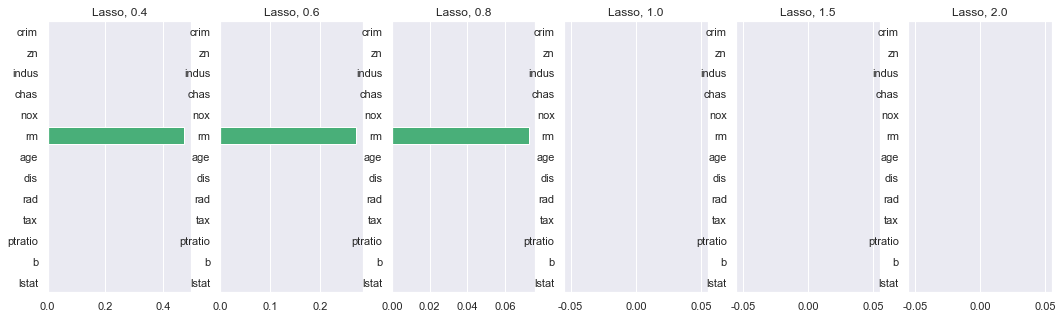

In [134]:
# 라쏘는 규제 세질수록 coef이 0이 된다. / 주요 피쳐만 갖고 학습하겠다.

# model = Lasso()
# myparam = {'alpha':[0.4,0.6, 0.8, 1.0, 1.5, 2.0]}

# gcv_model = GridSearchCV(model, param_grid=myparam, refit=True)
# gcv_model.fit(X_train, y_train)
# gcv_model.coef_


f, axs=plt.subplots(1,6)
alpha=[0.4,0.6, 0.8, 1.0, 1.5, 2.0]
for i in range(0,6):
    ls=Lasso(alpha=alpha[i])
    ls.fit(X_train, y_train)
    print(ls.coef_)

    axs[i].set_title(f"{ls.__class__.__name__}, {alpha[i]}")
    sns.barplot(y=X.columns, x=ls.coef_, ax=axs[i])

# myparam = {'alpha':[0.4,0.6, 0.8, 1.0]}
# from sklearn.model_selection import GridSearchCV
# gcv_model = GridSearchCV(model, param_grid=myparam, refit=True, cv=5)
# gcv_model.fit(X_train, y_train)







## Rigge
* alpha 가 커지면 피쳐의 coef_값이 0에 수렵된다==피쳐의 영향력을 최소화한다.(없애진 않는다.)
* L2규제사용

[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]
[-0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.]


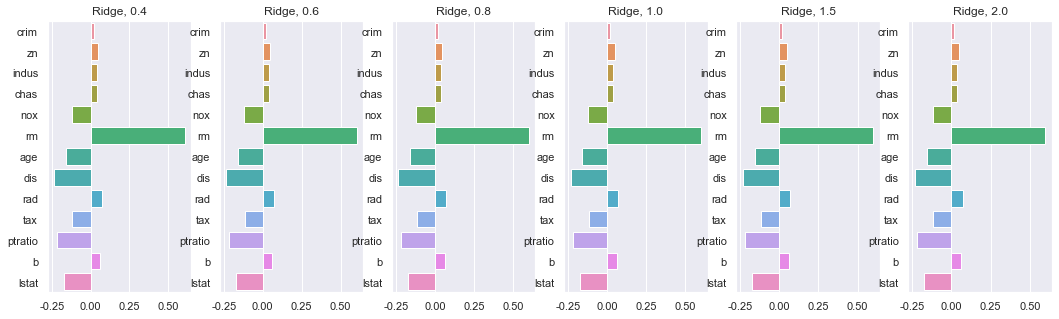

In [135]:
# ridge는 규제 세게 해도 coef가 0이 되는 건 아님

f, axs=plt.subplots(1,6)
alpha=[0.4,0.6, 0.8, 1.0, 1.5, 2.0]
for i in range(0,6):
    rg=Ridge(alpha=alpha[i])
    rg.fit(X_train, y_train)
    print(ls.coef_)

    axs[i].set_title(f"{rg.__class__.__name__}, {alpha[i]}")
    sns.barplot(y=X.columns, x=rg.coef_, ax=axs[i])

# myparam = {'alpha':[0.4,0.6, 0.8, 1.0]}
# from sklearn.model_selection import GridSearchCV
# gcv_model = GridSearchCV(model, param_grid=myparam, refit=True, cv=5)
# gcv_model.fit(X_train, y_train)


In [136]:
# 강사님 코드에서 mse 계산한 거 가져오기